
# Sobel Operator

The Sobel operator is applied as follows:

$ \Delta_1 = \begin{bmatrix} 
  -1 & 0 & 1\\
  -2 & 0 & 2\\
  -1 & 0 & 1
\end{bmatrix} $

$ \Delta_2 = \begin{bmatrix} 
  1 & 2 & 1\\
  0 & 0 & 0\\
  -1 & -2 & -1
\end{bmatrix} $

So the edge enhanced one will be calculated as:

$ g(x,y) = \sqrt{\Delta_1^2 + \Delta_2^2} $

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
#%matplotlib inline

#import matplotlib.image as img
#import PIL.Image as Image 
from PIL import Image
import math
import cmath

import time

import csv

from numpy import binary_repr

from fractions import gcd

In [ ]:
def generateRowColumnSobelGradients():
    """Generates the x-component and y-component of Sobel operators."""
    rowGradient = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
    colGradient = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    return rowGradient, colGradient

In [ ]:
def computeSobel(imge):
    """Computes and applies Sobel operator to an image."""
    N = imge.shape[0]
    result = np.zeros([N, N], dtype=float)
    
    #Copy the first and last rows, first and last columns
    result[0, :] = imge[0, :]
    result[:, 0] = imge[:, 0]
    result[N-1, :] = imge[N-1, :]
    result[:, N-1] = imge[:, N-1]
    
    #Generate the Row and Column Gradients of Sober.
    rowGradient, colGradient = generateRowColumnSobelGradients()
    
    #Sober Operator to the image.
    for i in np.arange(1, N-1):
        for j in np.arange(1, N-1):
            subImge = imge[i-1:i+2, j-1:j+2]
            rowSum = np.sum(rowGradient * subImge)
            colSum = np.sum(colGradient * subImge)
            result[i, j] = math.sqrt(rowSum**2 + colSum**2)
    
    return result

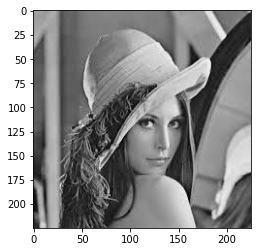

In [ ]:
img=np.array(Image.open("/content/lena.jpg").convert("L"))
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [ ]:
sobImge = computeSobel(img)


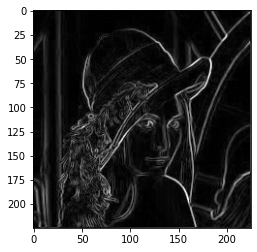

In [ ]:
plt.imshow(sobImge, cmap=plt.get_cmap('gray'))